In [1]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import itertools
import random

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import euclidean

# set working directory
#os.chdir("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth")

# set style
#sns.set_style("white")

83


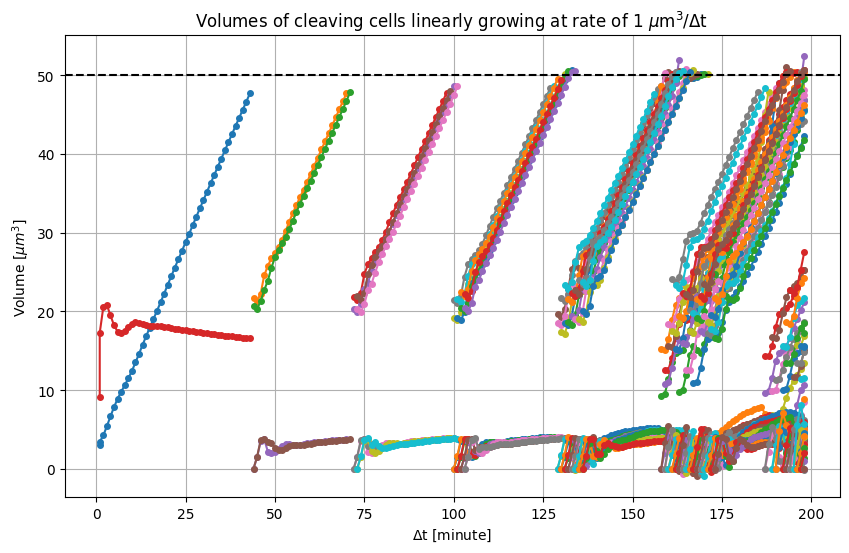

In [7]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240226_division_targetvolume50/20240226_division_targetvolume50_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240226_division_targetvolume50/20240226_division_targetvolume50_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240226_division_targetvolume50/20240226_division_targetvolume50_pressures.json", 'r') as f1:
    pressures1 = json.load(f1)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

count = 0
for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, '-o', label=cell_name, markersize=4)
    count += 1

count = 0
for cell_name, pressure in pressures1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(pressure)]

    ax1.plot(frames, pressure, '-o', label=cell_name, markersize=4)
    count += 1

print(count)

ax1.set_xlabel(r'$\Delta$t [minute]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')

ax1.set_title(rf'Volumes of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/$\Delta$t')
ax1.axhline(y=50, ls='--', color='black', label='Target volume')
ax1.grid(True)
#ax1.legend(title=f'Cells; N$_f$ = {count}', loc='lower right', ncol=3, fontsize='x-small', bbox_to_anchor=(1.62, -0.01))

# Saving the plot
#plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240226_division_targetvolume50/20240226_division_targetvolume50_all_cells.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

plt.show()

Total cells plotted: 121
Number of times truncated: 60a
Average length of truncation: 1.00 units
Number of cells at final frame (t=150): 0


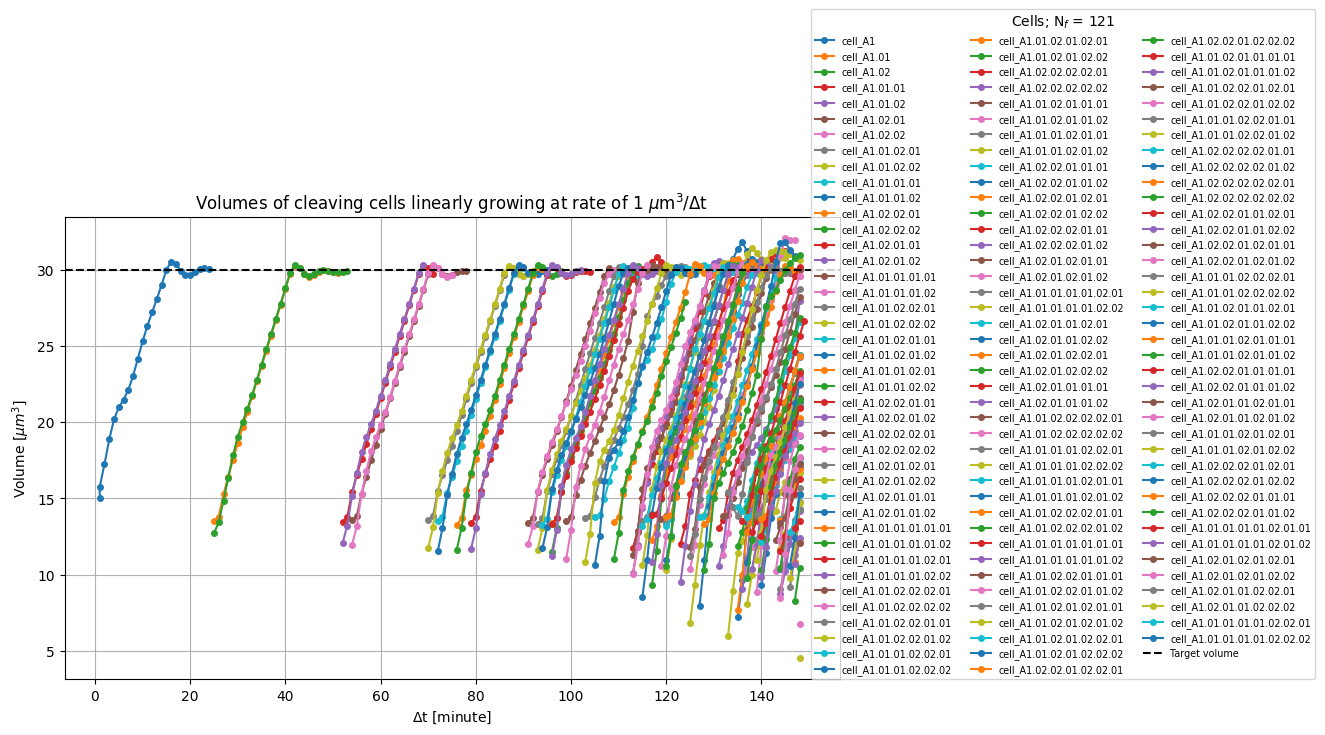

In [4]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/20240227_division_frame150_targetvolume30_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/20240227_division_frame150_targetvolume30_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

count = 0
final_frame_count = 0  # Counter for cells at the final frame
truncation_count = 0  # Initialize truncation counter
truncation_length_total = 0  # Initialize total truncation length
for cell_name, volumes in volumes1.items():
    frames = frames1.get(cell_name, [])  # Get frames for current cell, default to empty list if not found
    # Truncate frames if longer than volumes
    min_length = min(len(frames), len(volumes))
    if len(frames) > min_length or len(volumes) > min_length:
        truncation_count += 1  # Increment truncation counter
        truncation_length_total += max(len(frames) - min_length, len(volumes) - min_length)  # Add truncated length to total

    frames = frames[:min_length]
    volumes = volumes[:min_length]

    ax1.plot(frames, volumes, '-o', label=cell_name, markersize=4)
    count += 1

    # Check if the current cell has data at the final frame
    if frames and frames[-1] == 150:
        final_frame_count += 1

print(f"Total cells plotted: {count}")
print(f"Number of times truncated: {truncation_count}a")
if truncation_count > 0:
    average_truncation_length = truncation_length_total / truncation_count
    print(f"Average length of truncation: {average_truncation_length:.2f} units")

print(f"Number of cells at final frame (t=150): {final_frame_count}")

ax1.set_xlabel(r'$\Delta$t [minute]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')

ax1.set_title(rf'Volumes of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/$\Delta$t')
ax1.axhline(y=30, ls='--', color='black', label='Target volume')
'''ax1.axvline(x=25, ls='--', color='darkred')
ax1.axvline(x=50, ls='--', color='darkred')
ax1.axvline(x=75, ls='--', color='darkred')'''
ax1.grid(True)
ax1.legend(title=f'Cells; N$_f$ = {count}', loc='lower right', ncol=3, fontsize='x-small', bbox_to_anchor=(1.62, -0.01))

# Saving the plot
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240226_division_targetvolume50/20240226_division_targetvolume50_all_cells.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

plt.show()

Total cells plotted: 121
Number of times truncated: 60
Average length of truncation: 1.00 units
Number of cells at final frame (t=150): 64


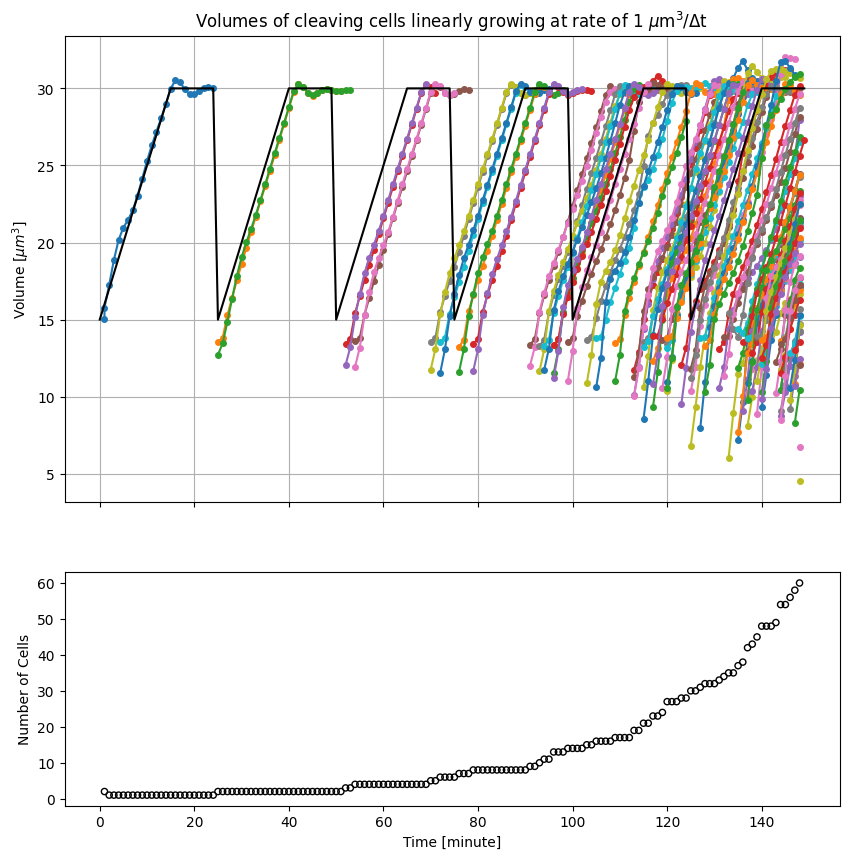

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define the range of x values
x = np.arange(0, 150, 1)

# Define the function to generate y values
def generate_y(x):
    cycle_length = 25
    starting_y = 15
    slope = 1
    y = []
    for i in range(len(x)):
        cycle = (x[i] + starting_y) // cycle_length
        if slope * (x[i] % cycle_length) + starting_y <= 30:
            y.append(slope * (x[i] % cycle_length) + starting_y)
        else:
            y.append(30)
    return np.array(y)

# Generate y values
y = generate_y(x)

# Overlaying the simulated data on the existing plot

# Define the path to the JSON files
volumes_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/20240227_division_frame150_targetvolume30_volumes.json"
frames_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/20240227_division_frame150_targetvolume30_frame_cells.json"

# Load data from JSON files
with open(volumes_file_path, 'r') as f1:
    volumes1 = json.load(f1)
with open(frames_file_path, 'r') as f2:
    frames1 = json.load(f2)

# Initialize a dictionary to store the number of cells at each frame
cells_per_frame = {}

# Iterate over each cell
for cell, frames in frames1.items():
    # Iterate over the frames the cell appears in
    for frame in frames:
        # If the frame is not already in the dictionary, add it with a count of 1
        # Otherwise, increment the count
        if frame not in cells_per_frame:
            cells_per_frame[frame] = 1
        else:
            cells_per_frame[frame] += 1

# Extract simulation cost and number of cells
simulation_cost = list(cells_per_frame.keys())
num_cells = list(cells_per_frame.values())

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),  gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

count = 0
final_frame_count = 0
truncation_count = 0  # Initialize truncation counter
truncation_length_total = 0  # Initialize total truncation length

for cell_name, volumes in volumes1.items():
    frames = frames1.get(cell_name, [])  # Get frames for current cell, default to empty list if not found
    # Truncate frames if longer than volumes
    min_length = min(len(frames), len(volumes))
    if len(frames) > min_length or len(volumes) > min_length:
        truncation_count += 1  # Increment truncation counter
        truncation_length_total += max(len(frames) - min_length, len(volumes) - min_length)  # Add truncated length to total

    frames = frames[:min_length]
    volumes = volumes[:min_length]

    ax1.plot(frames, volumes, '-o', label=cell_name, markersize=4)
    count += 1

    # Check if the current cell has data at the final frame
    if frames and frames[-1] >= 146:
        final_frame_count += 1

# Plot the simulated data
ax1.plot(x, y, label='Theoretical cell cycle', color='black')

print(f"Total cells plotted: {count}")
print(f"Number of times truncated: {truncation_count}")
if truncation_count > 0:
    average_truncation_length = truncation_length_total / truncation_count
    print(f"Average length of truncation: {average_truncation_length:.2f} units")

print(f"Number of cells at final frame (t=150): {final_frame_count}")

ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax1.set_title(rf'Volumes of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/$\Delta$t')
ax1.grid(True)

# Plot the number of cells on the second plot
ax2.scatter(simulation_cost[:-1], num_cells[:-1], s=20, color='black', marker='o', facecolors='none', edgecolors='black')
ax2.set_xlabel(r'Time [minute]')
ax2.set_ylabel('Number of Cells')
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/20240226_division_targetvolume30_all_cells.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

Total cells plotted: 127
Number of times truncated: 63
Average length of truncation: 1.00 units
Number of cells at final frame (t=150): 64


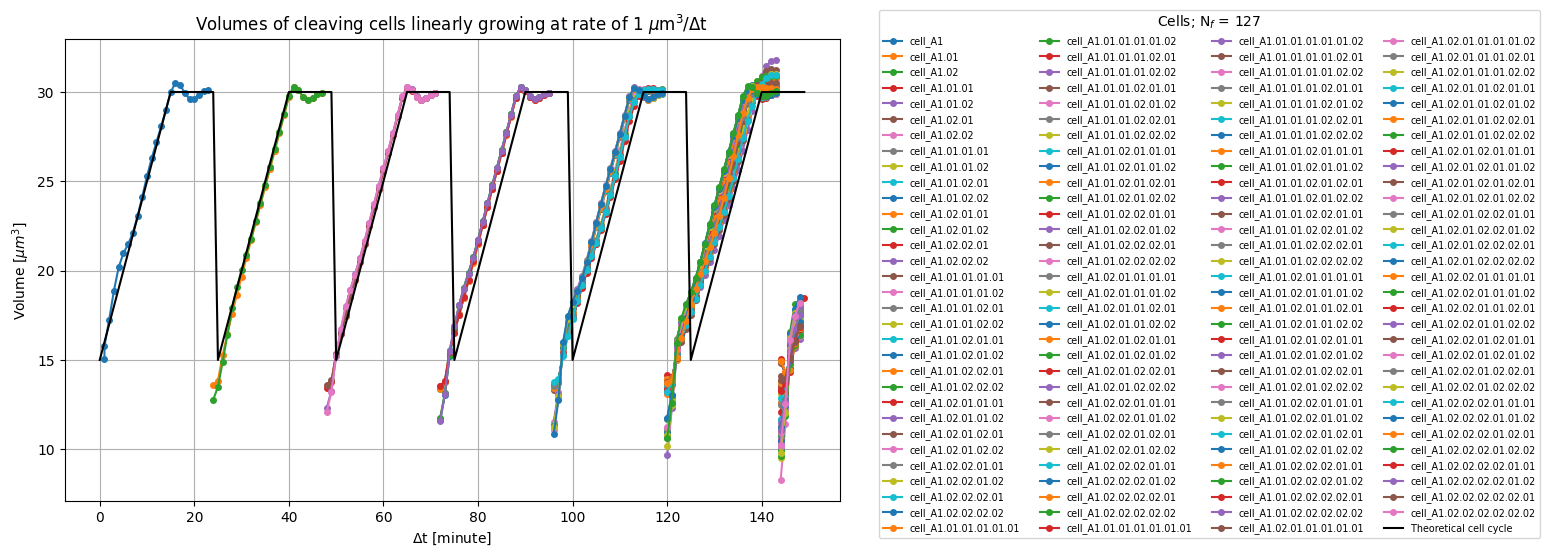

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define the range of x values
x = np.arange(0, 150, 1)

# Define the function to generate y values
def generate_y(x):
    cycle_length = 25
    starting_y = 15
    slope = 1
    y = []
    for i in range(len(x)):
        cycle = (x[i] + starting_y) // cycle_length
        if slope * (x[i] % cycle_length) + starting_y <= 30:
            y.append(slope * (x[i] % cycle_length) + starting_y)
        else:
            y.append(30)
    return np.array(y)

# Generate y values
y = generate_y(x)

# Overlaying the simulated data on the existing plot

# Define the path to the JSON files
volumes_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous4_volumes.json"
frames_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous4_frame_cells.json"

# Load data from JSON files
with open(volumes_file_path, 'r') as f1:
    volumes1 = json.load(f1)
with open(frames_file_path, 'r') as f1:
    frames1 = json.load(f1)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

count = 0
final_frame_count = 0
truncation_count = 0  # Initialize truncation counter
truncation_length_total = 0  # Initialize total truncation length

for cell_name, volumes in volumes1.items():
    frames = frames1.get(cell_name, [])  # Get frames for current cell, default to empty list if not found
    # Truncate frames if longer than volumes
    min_length = min(len(frames), len(volumes))
    if len(frames) > min_length or len(volumes) > min_length:
        truncation_count += 1  # Increment truncation counter
        truncation_length_total += max(len(frames) - min_length, len(volumes) - min_length)  # Add truncated length to total

    frames = frames[:min_length]
    volumes = volumes[:min_length]

    ax1.plot(frames, volumes, '-o', label=cell_name, markersize=4)
    count += 1

    # Check if the current cell has data at the final frame
    if frames and frames[-1] >= 145:
        final_frame_count += 1

# Plot the simulated data
ax1.plot(x, y, label='Theoretical cell cycle', color='black')

print(f"Total cells plotted: {count}")
print(f"Number of times truncated: {truncation_count}")
if truncation_count > 0:
    average_truncation_length = truncation_length_total / truncation_count
    print(f"Average length of truncation: {average_truncation_length:.2f} units")

print(f"Number of cells at final frame (t=150): {final_frame_count}")

ax1.set_xlabel(r'$\Delta$t [minute]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')

ax1.set_title(rf'Volumes of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/$\Delta$t')
#ax1.axhline(y=30, ls='--', color='black', label='Target volume')
ax1.grid(True)
ax1.legend(title=f'Cells; N$_f$ = {count}', loc='lower right', ncol=4, fontsize='x-small', bbox_to_anchor=(1.91, -0.09))

# Saving the plot
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_volumes_over_time4.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

plt.show()

Total cells plotted: 255
Number of times truncated: 127
Average length of truncation: 1.00 units
Number of cells at final frame (t=150): 192


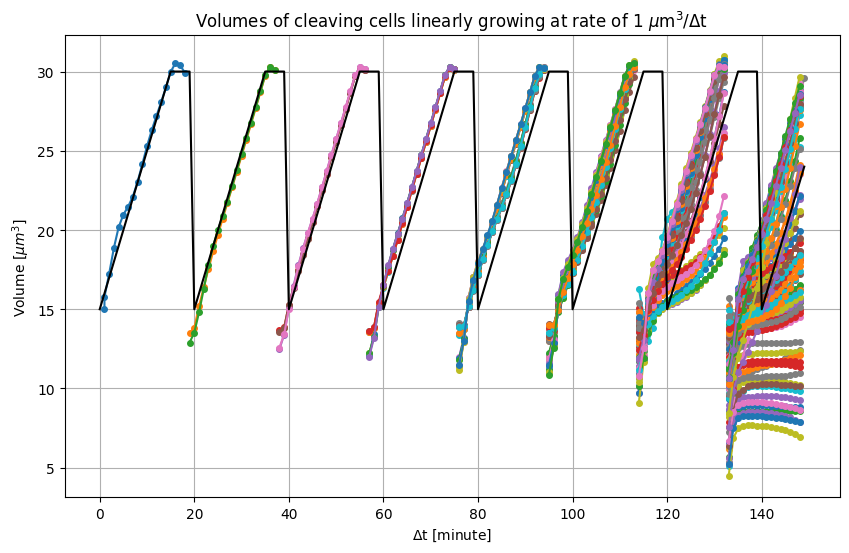

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define the range of x values
x = np.arange(0, 150, 1)

# Define the function to generate y values
def generate_y(x):
    cycle_length = 20
    starting_y = 15
    slope = 1
    y = []
    for i in range(len(x)):
        cycle = (x[i] + starting_y) // cycle_length
        if slope * (x[i] % cycle_length) + starting_y <= 30:
            y.append(slope * (x[i] % cycle_length) + starting_y)
        else:
            y.append(30)
    return np.array(y)

# Generate y values
y = generate_y(x)

# Overlaying the simulated data on the existing plot

# Define the path to the JSON files
volumes_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_volumes.json"
frames_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_frame_cells.json"

# Load data from JSON files
with open(volumes_file_path, 'r') as f1:
    volumes1 = json.load(f1)
with open(frames_file_path, 'r') as f1:
    frames1 = json.load(f1)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

count = 0
final_frame_count = 0
truncation_count = 0  # Initialize truncation counter
truncation_length_total = 0  # Initialize total truncation length

for cell_name, volumes in volumes1.items():
    frames = frames1.get(cell_name, [])  # Get frames for current cell, default to empty list if not found
    # Truncate frames if longer than volumes
    min_length = min(len(frames), len(volumes))
    if len(frames) > min_length or len(volumes) > min_length:
        truncation_count += 1  # Increment truncation counter
        truncation_length_total += max(len(frames) - min_length, len(volumes) - min_length)  # Add truncated length to total

    frames = frames[:min_length]
    volumes = volumes[:min_length]

    ax1.plot(frames, volumes, '-o', label=cell_name, markersize=4)
    count += 1

    # Check if the current cell has data at the final frame
    if frames and frames[-1] >= 125:
        final_frame_count += 1

# Plot the simulated data
ax1.plot(x, y, label='Theoretical cell cycle', color='black')

print(f"Total cells plotted: {count}")
print(f"Number of times truncated: {truncation_count}")
if truncation_count > 0:
    average_truncation_length = truncation_length_total / truncation_count
    print(f"Average length of truncation: {average_truncation_length:.2f} units")

print(f"Number of cells at final frame (t=150): {final_frame_count}")

ax1.set_xlabel(r'$\Delta$t [minute]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')

ax1.set_title(rf'Volumes of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/$\Delta$t')
#ax1.axhline(y=30, ls='--', color='black', label='Target volume')
ax1.grid(True)
#ax1.legend(title=f'Cells; N$_f$ = {count}', loc='lower right', ncol=4, fontsize='x-small', bbox_to_anchor=(1.91, -0.09))

# Saving the plot
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_volumes_over_time5.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

plt.show()

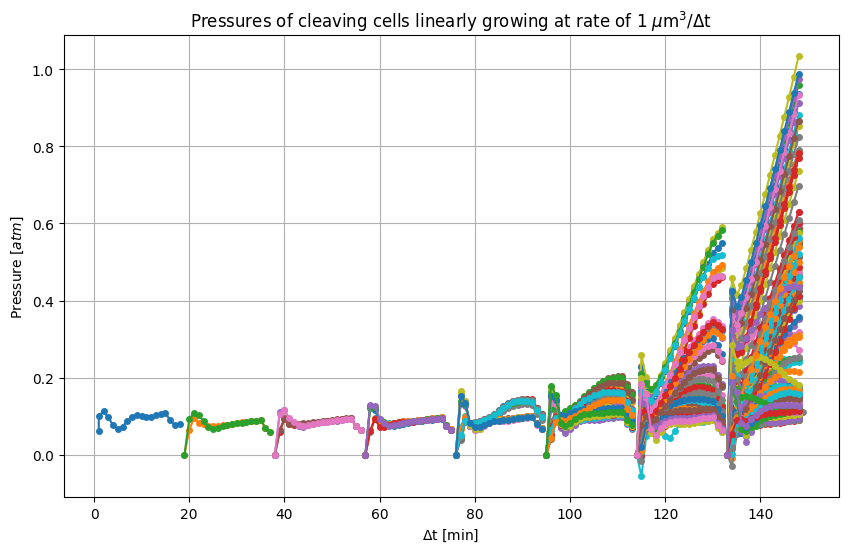

In [17]:
# Define the range of x values
x = np.arange(0, 150, 1)

# Overlaying the simulated data on the existing plot

# Define the path to the JSON files
volumes_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_volumes.json"
frames_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_frame_cells.json"
pressures_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_pressures.json"

# Load data from JSON files
with open(volumes_file_path, 'r') as f1:
    volumes1 = json.load(f1)
with open(frames_file_path, 'r') as f1:
    frames1 = json.load(f1)
with open(pressures_file_path, 'r') as f1:
    pressures1 = json.load(f1)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))


for cell_name, pressure in pressures1.items():
    frames = frames1.get(cell_name, [])  # Get frames for current cell, default to empty list if not found
    # Truncate frames if longer than volumes
    min_length = min(len(frames), len(pressure))
    if len(frames) > min_length or len(pressure) > min_length:
        truncation_count += 1  # Increment truncation counter
        truncation_length_total += max(len(frames) - min_length, len(pressure) - min_length)  # Add truncated length to total

    frames = frames[:min_length]
    pressures = pressure[:min_length]
    pressures = [(pressure * 2) * 0.00986923267 for pressure in pressures]

    ax1.plot(frames, pressures, '-o', label=cell_name, markersize=4)
    count += 1

ax1.set_xlabel(r'$\Delta$t [min]')
ax1.set_ylabel(r'Pressure [$atm$]')

ax1.set_title(rf'Pressures of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/$\Delta$t')
#ax1.axhline(y=30, ls='--', color='black', label='Target volume')
ax1.grid(True)
#ax1.legend(title=f'Cells; N$_f$ = {count}', loc='lower right', ncol=4, fontsize='x-small', bbox_to_anchor=(1.91, -0.09))

# Saving the plot
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_pressures_over_time5.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

plt.show()

Total cells plotted: 255
Number of times truncated: 127
Average length of truncation: 1.00 units
Number of cells at final frame (t=150): 128


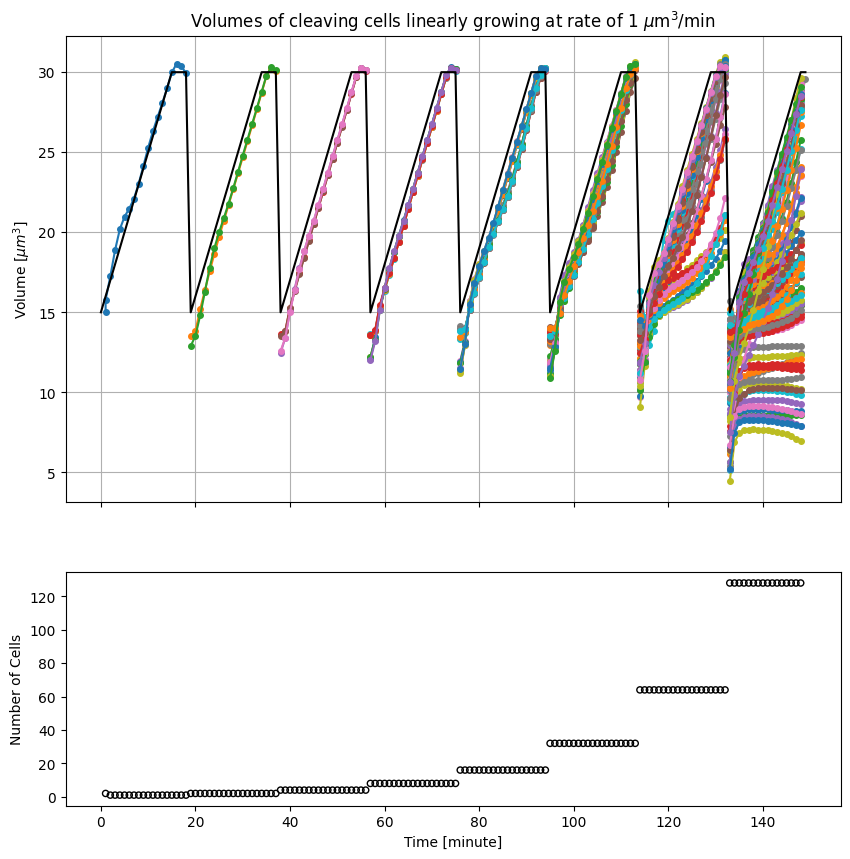

In [87]:
# Define the range of x values
x = np.arange(0, 150, 1)

# Define the function to generate y values
def generate_y(x):
    cycle_length = 19
    starting_y = 15
    slope = 1
    y = []
    for i in range(len(x)):
        cycle = (x[i] + starting_y) // cycle_length
        if slope * (x[i] % cycle_length) + starting_y <= 30:
            if (i % (cycle_length)) == (0):
                y.append(15)
            else: 
                y.append(slope * (x[i] % (cycle_length)) + starting_y)
        else:
            y.append(30)
    return np.array(y)

# Generate y values
y = generate_y(x)

# Overlaying the simulated data on the existing plot

# Define the path to the JSON files
volumes_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_volumes.json"
frames_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_frame_cells.json"

# Load data from JSON files
with open(volumes_file_path, 'r') as f1:
    volumes1 = json.load(f1)
with open(frames_file_path, 'r') as f2:
    frames1 = json.load(f2)

# Initialize a dictionary to store the number of cells at each frame
cells_per_frame = {}

# Iterate over each cell
for cell, frames in frames1.items():
    # Iterate over the frames the cell appears in
    for frame in frames:
        # If the frame is not already in the dictionary, add it with a count of 1
        # Otherwise, increment the count
        if frame not in cells_per_frame:
            cells_per_frame[frame] = 1
        else:
            cells_per_frame[frame] += 1

# Extract simulation cost and number of cells
simulation_cost = list(cells_per_frame.keys())
num_cells = list(cells_per_frame.values())

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),  gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

count = 0
final_frame_count = 0
truncation_count = 0  # Initialize truncation counter
truncation_length_total = 0  # Initialize total truncation length

for cell_name, volumes in volumes1.items():
    frames = frames1.get(cell_name, [])  # Get frames for current cell, default to empty list if not found
    # Truncate frames if longer than volumes
    min_length = min(len(frames), len(volumes))
    if len(frames) > min_length or len(volumes) > min_length:
        truncation_count += 1  # Increment truncation counter
        truncation_length_total += max(len(frames) - min_length, len(volumes) - min_length)  # Add truncated length to total

    frames = frames[:min_length]
    volumes = volumes[:min_length]

    ax1.plot(frames, volumes, '-o', label=cell_name, markersize=4)
    count += 1

    # Check if the current cell has data at the final frame
    if frames and frames[-1] >= 146:
        final_frame_count += 1

# Plot the simulated data
ax1.plot(x, y, label='Theoretical cell cycle', color='black')

print(f"Total cells plotted: {count}")
print(f"Number of times truncated: {truncation_count}")
if truncation_count > 0:
    average_truncation_length = truncation_length_total / truncation_count
    print(f"Average length of truncation: {average_truncation_length:.2f} units")

print(f"Number of cells at final frame (t=150): {final_frame_count}")

ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax1.set_title(rf'Volumes of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/min')
ax1.grid(True)

# Plot the number of cells on the second plot
ax2.scatter(simulation_cost[:-1], num_cells[:-1], s=20, color='black', marker='o', facecolors='none', edgecolors='black')
ax2.set_xlabel(r'Time [minute]')
ax2.set_ylabel('Number of Cells')
# Saving the plot
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_volumes_over_time5.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

plt.show()

Total cells plotted: 169
Number of times truncated: 85
Average length of truncation: 1.00 units
Number of cells at final frame (t=150): 0


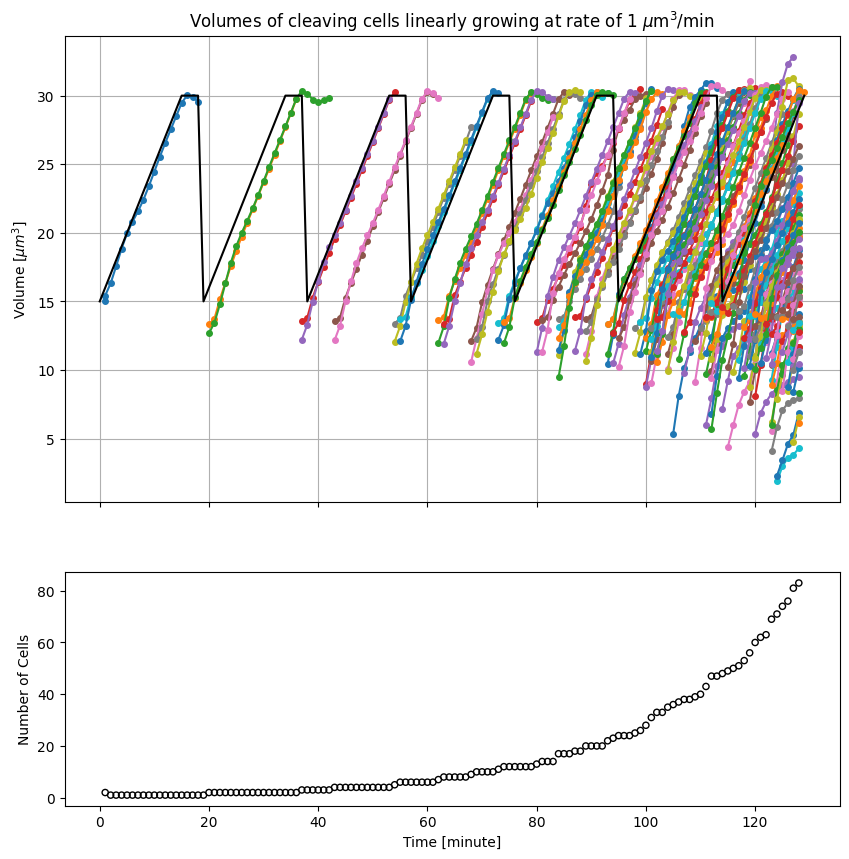

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import json

import numpy as np

# Define the range of x values
x = np.arange(0, 130, 1)

# Define the function to generate y values
def generate_y(x):
    cycle_length = 19
    starting_y = 15
    slope = 1
    y = []
    for i in range(len(x)):
        cycle = (x[i] + starting_y) // cycle_length
        if slope * (x[i] % cycle_length) + starting_y <= 30:
            if (i % (cycle_length)) == (0):
                y.append(15)
            else: 
                y.append(slope * (x[i] % (cycle_length)) + starting_y)
        else:
            y.append(30)
    return np.array(y)

# Generate y values
y = generate_y(x)

# Overlaying the simulated data on the existing plot

# Define the path to the JSON files
volumes_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240304_desynchronized_division/20240304_desynchronized_division_1_volumes.json"
frames_file_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240304_desynchronized_division/20240304_desynchronized_division_1_frame_cells.json"

# Load data from JSON files
with open(volumes_file_path, 'r') as f1:
    volumes1 = json.load(f1)
with open(frames_file_path, 'r') as f2:
    frames1 = json.load(f2)

# Initialize a dictionary to store the number of cells at each frame
cells_per_frame = {}

# Iterate over each cell
for cell, frames in frames1.items():
    # Iterate over the frames the cell appears in
    for frame in frames:
        # If the frame is not already in the dictionary, add it with a count of 1
        # Otherwise, increment the count
        if frame not in cells_per_frame:
            cells_per_frame[frame] = 1
        else:
            cells_per_frame[frame] += 1

# Extract simulation cost and number of cells
simulation_cost = list(cells_per_frame.keys())
num_cells = list(cells_per_frame.values())

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),  gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

count = 0
final_frame_count = 0
truncation_count = 0  # Initialize truncation counter
truncation_length_total = 0  # Initialize total truncation length

for cell_name, volumes in volumes1.items():
    frames = frames1.get(cell_name, [])  # Get frames for current cell, default to empty list if not found
    # Truncate frames if longer than volumes
    min_length = min(len(frames), len(volumes))
    if len(frames) > min_length or len(volumes) > min_length:
        truncation_count += 1  # Increment truncation counter
        truncation_length_total += max(len(frames) - min_length, len(volumes) - min_length)  # Add truncated length to total

    frames = frames[:min_length]
    volumes = volumes[:min_length]

    ax1.plot(frames, volumes, '-o', label=cell_name, markersize=4)
    count += 1

    # Check if the current cell has data at the final frame
    if frames and frames[-1] >= 146:
        final_frame_count += 1

# Plot the simulated data
ax1.plot(x, y, label='Theoretical cell cycle', color='black')

print(f"Total cells plotted: {count}")
print(f"Number of times truncated: {truncation_count}")
if truncation_count > 0:
    average_truncation_length = truncation_length_total / truncation_count
    print(f"Average length of truncation: {average_truncation_length:.2f} units")

print(f"Number of cells at final frame (t=150): {final_frame_count}")

ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax1.set_title(rf'Volumes of cleaving cells linearly growing at rate of 1 $\mu$m$^3$/min')
ax1.grid(True)

# Plot the number of cells on the second plot
ax2.scatter(simulation_cost[:-1], num_cells[:-1], s=20, color='black', marker='o', facecolors='none', edgecolors='black')
ax2.set_xlabel(r'Time [minute]')
ax2.set_ylabel('Number of Cells')
# Saving the plot
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240304_desynchronized_division/20240312_volumes_over_time_1.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

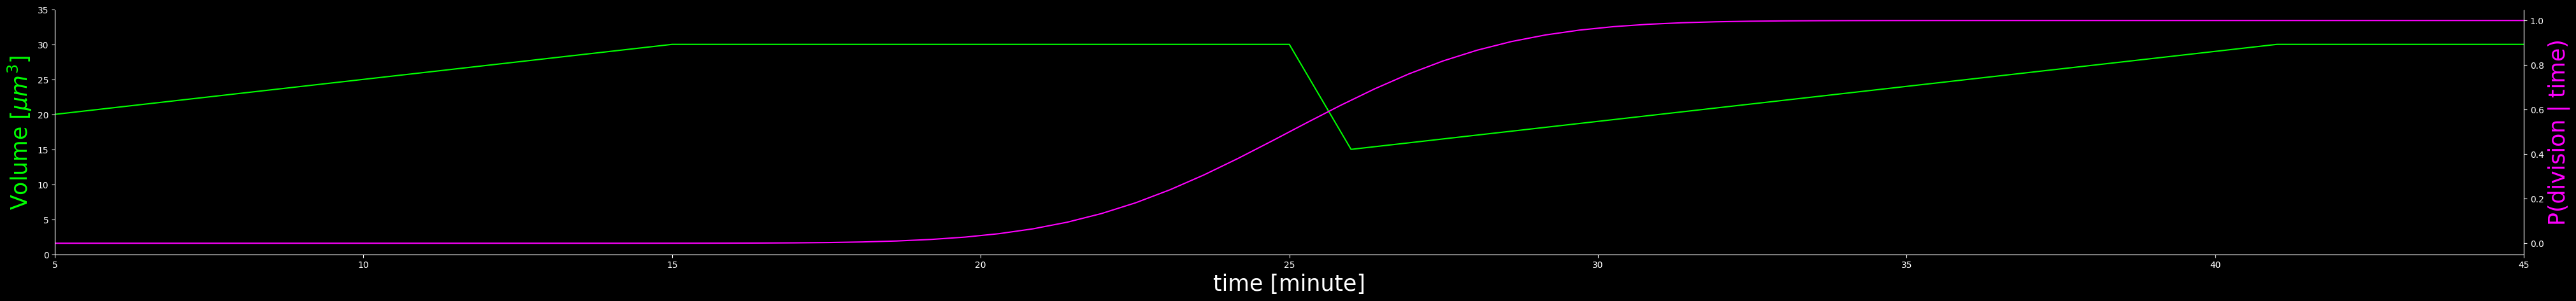

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_cdf(mu, variance):
    # Create a Gaussian distribution
    sigma = np.sqrt(variance)
    x = np.linspace(mu - 10*sigma, mu + 10*sigma, 100)
    y = norm.cdf(x, mu, sigma)

    return x, y


# Define the range of x values
x_1 = np.arange(0, 150, 1)

# Define the function to generate y values
def generate_y(x):
    cycle_length = 26
    starting_y = 15
    slope = 1
    y = []
    for i in range(len(x)):
        cycle = (x[i] + starting_y) // cycle_length
        if slope * (x[i] % cycle_length) + starting_y <= 30:
            if (i % (cycle_length)) == (0):
                y.append(15)
            else: 
                y.append(slope * (x[i] % (cycle_length)) + starting_y)
        else:
            y.append(30)
    return np.array(y)

# Generate y values
y_1 = generate_y(x_1)

# Example usage
mean = 25
variance = 0.3 * mean
x, y = plot_gaussian_cdf(mean, variance)

# Plot the cumulative distribution function (CDF)
fig, ax1 = plt.subplots(figsize=(50, 5))  # Change figsize here
ax2 = ax1.twinx()

# Set the background color to black
fig.patch.set_facecolor('black')
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Plot with pink and green fluorescent lines
ax2.plot(x, y, color='magenta')
ax1.plot(x_1, y_1, color='lime')

# Set plot labels and limits
ax1.set_ylabel(r'Volume [$\mu m^3$]', fontsize=25, color='lime')
ax2.set_ylabel(r'P(division | time)', fontsize=25, color='magenta')
ax1.set_xlabel('time [minute]', fontsize=25, color='white')
plt.xlim([5, 45])
ax1.set_ylim([0, 35])

# Set the color of axis lines to white
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax2.spines['bottom'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax2.tick_params(axis='y', colors='white')


# Save and display the plot
plt.savefig('/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/gaussian_cdf.png', dpi=300, transparent=True)
plt.show()
